Ước lượng Lipschitz theo y: 2
Ước lượng Lipschitz theo y_delay: 1
Độ biến thiên (gradient) delay: 0
(Nếu các giá trị này quá lớn, có thể báo hiệu vi phạm giả định Lipschitz.)



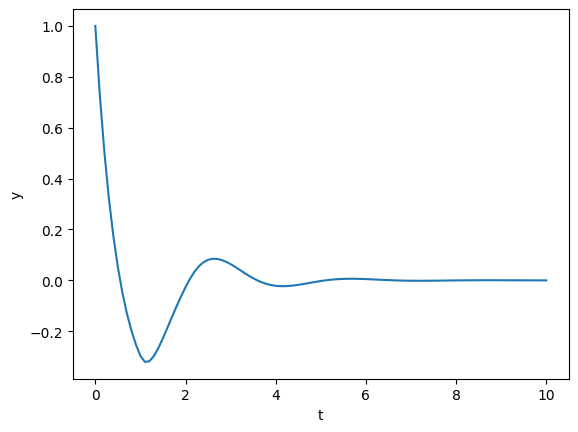

(101, 101)

In [5]:
from doan1_dongian.lib_RK_MoS import *
import numpy as np
import matplotlib.pyplot as plt
 
def f(t, y, y_delay):
    return -2*y-y_delay
def tau(t, y):
    return 1.0
def phi(t):
    return 1
t0 = 0
tf = 10.0
h0 = 0.1
tol = 1e-6
check_conditions(f, tau, phi, t0)

sol01 = solve_dde(
    f=f,
    tau=tau,
    phi=phi,
    t0=t0,
    t_final=tf,
    tol=1e-6,      # sai số có thể giảm xuống 1e-7, 1e-8 nếu cần
    h_init=0.1,    # bước khởi tạo
    h_min=1e-10,   # bước nhỏ nhất
    h_max=0.5,      # bước lớn nhất
    adaptive=False
)
# sol005 = solve_dde(
#     f=f,
#     tau=tau,
#     phi=phi,
#     t0=t0,
#     t_final=tf,
#     tol=1e-6,      # sai số có thể giảm xuống 1e-7, 1e-8 nếu cần
#     h_init=0.05,    # bước khởi tạo
#     h_min=1e-10,   # bước nhỏ nhất
#     h_max=0.5,      # bước lớn nhất
#     adaptive=False
# )
t_values_01 = [node['t'] for node in sol01]
y_values_01 = [node['y'] for node in sol01]
# t_values_005 = [node['t'] for node in sol005]
# y_values_005 = [node['y'] for node in sol005]
plt.plot(t_values_01, y_values_01)
plt.xlabel('t')
plt.ylabel('y')
plt.show()
len(t_values_01), len(y_values_01)


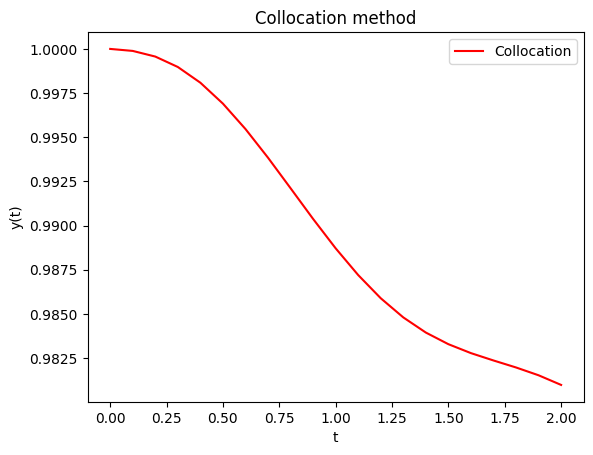

In [2]:
from doan1_dongian.lib_collocation import *
import numpy as np
import matplotlib.pyplot as plt
# hàm np.atleast_1d sẽ trả về một mảng có ít nhất 1 chiều
def f(t, y, y_delay):
    y = np.atleast_1d(y)
    y_delay = np.atleast_1d(y_delay)
    return -1000*y+999*y_delay
def tau(t, y):
    return 0.1
def phi(t):
    return np.atleast_1d(1.0)

t0 = 0
tf = 2
h0 = 0.1
tol = 1e-6
# sau này sẽ thêm các hàm ước lượng Lipchitz sau
L_f_u = 0.0
L_f_v = 1.0
L_tau_y = 0.0

ts, ys = solve_dde_collocation(f, tau, phi, t0, tf, h0,
                                              method_name='gauss', s=2, tol=tol,
                                              L_f_u=L_f_u, L_f_v=L_f_v, L_tau_y=L_tau_y,
                                              h_min=1e-6, h_max=0.1, adaptive=False)
plt.plot(ts, ys, 'r-', label='Collocation')
plt.title('Collocation method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
def compute_error(ts, ys):
    return np.abs(ys[:, 0] - y_exact(ts))
def plot_error(ts, errors):
        plt.figure(figsize=(10, 6))
        plt.plot(ts, errors, 'r-', label='Sai số')
        plt.xlabel('t')
        plt.ylabel('Sai số')
        plt.yscale('log')
        plt.title("Sai số giữa nghiệm chính xác và nghiệm nội suy")
        plt.legend()
        plt.show()
# errors = compute_error(ts, ys)
# plot_error(ts, errors)



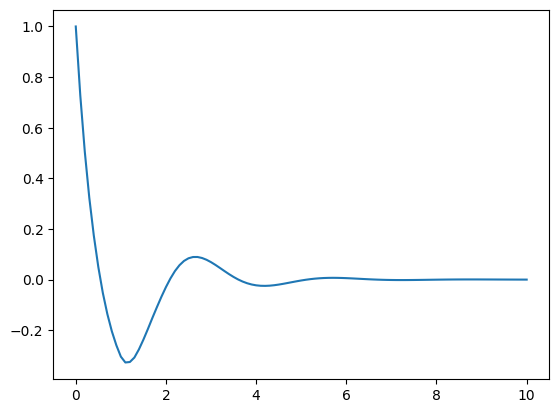

In [4]:
from multistep import *
import numpy as np
import matplotlib.pyplot as plt
def f(t, y, y_delay):
    return -2*y - y_delay
tau = 1.0
def phi(t):
    return 1.0
t0, tf, h = 0.0, 10, 0.1
t_grid, y_grid = epmm24(f, phi, t0, tf, tau, h)
plt.plot(t_grid, y_grid, label="EPMM(2,4)")


[0.1        0.10941743 0.11972174 ... 1.         1.         1.        ]


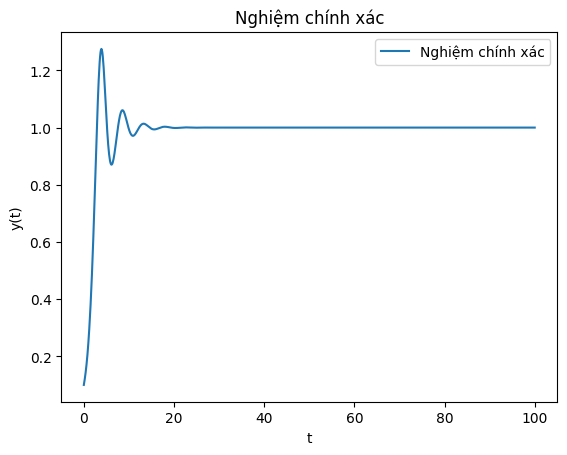

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Dùng pandas.read_csv để đọc file, bỏ qua các dòng bắt đầu bằng '#'.
df = pd.read_csv("logistic_dde_solution.txt", comment='#', sep='\s+', header=None)
# Giả sử cột 0 là t và cột 1 là y:
y_exact = df[1].values[:]
print(y_exact)
# Tạo một mảng t từ 0 đến 100 với bước nhảy 0.1
stop = 100
start = 0
step = 0.1
t = np.arange(0, stop+step, step)
#vẽ đồ thị
plt.plot(t, y_exact, label='Nghiệm chính xác')
plt.title('Nghiệm chính xác')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
errors_collocation = abs(y_exact - ys[:, 0])
errors_epmm = abs(y_exact - y_grid)
errors_cubic01 = abs(y_exact - y_values_01)

Text(0.5, 1.0, 'Phương pháp Gauss s=2')

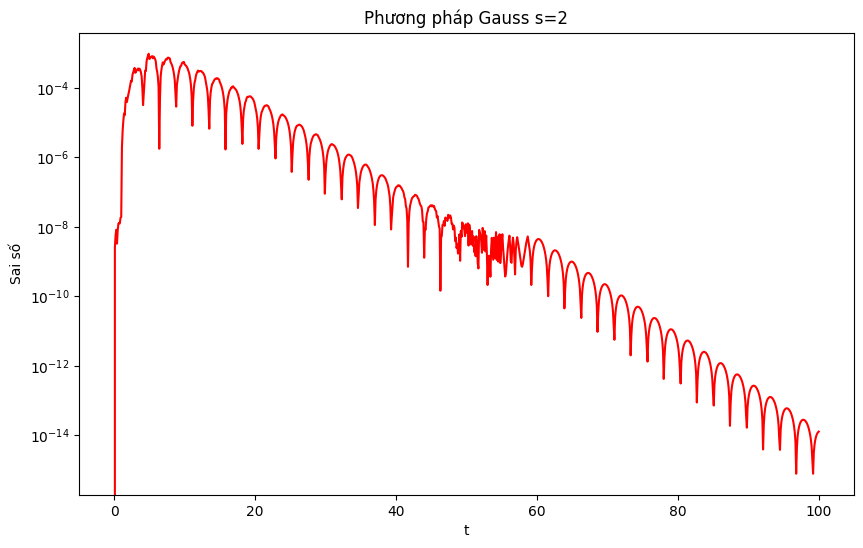

In [19]:
#vẽ đồ thị sai số
plt.figure(figsize=(10, 6))
plt.plot(ts, errors_collocation, 'r-', label='Sai số')
plt.xlabel('t')
plt.yscale('log')
plt.ylabel('Sai số')
plt.title("Phương pháp Gauss s=2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Phương pháp RK4+Hermite')

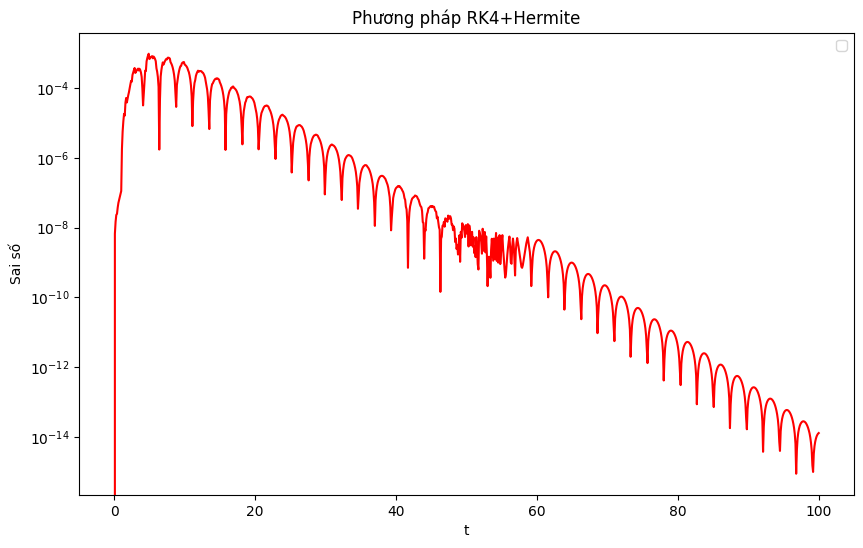

In [22]:
#vẽ đồ thị sai số
plt.figure(figsize=(10, 6))
plt.plot(t_values_01, errors_cubic01, 'r-')
# plt.plot(t_values_005, errors_cubic005, 'b-', label='Sai số h=0.05')
plt.legend()
plt.xlabel('t')
plt.yscale('log')
plt.ylabel('Sai số')
plt.title("Phương pháp RK4+Hermite")

Text(0.5, 1.0, 'Phương pháp EMPM(2,4)')

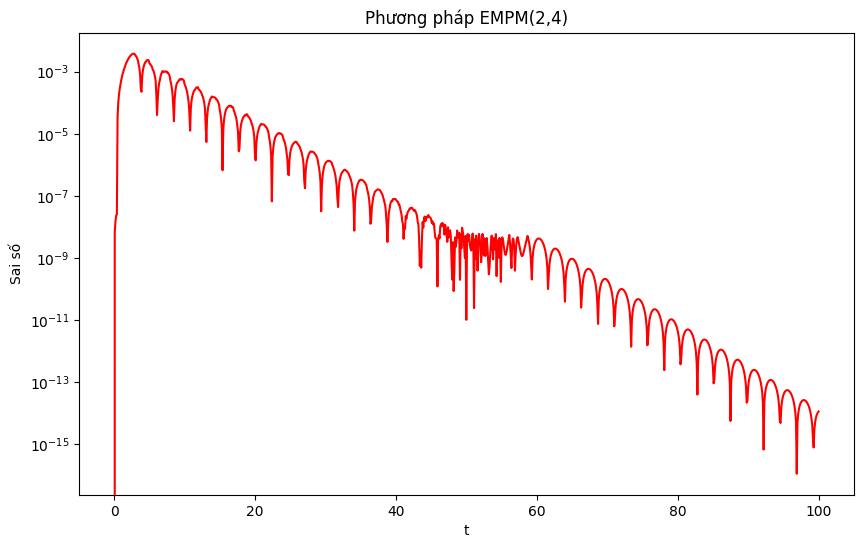

In [21]:
#vẽ đồ thị sai số
plt.figure(figsize=(10, 6))
plt.plot(t_grid, errors_epmm, 'r-', label='Sai số')
plt.xlabel('t')
plt.yscale('log')
plt.ylabel('Sai số')
plt.title("Phương pháp EMPM(2,4)")